# Keras를 활용한 심층 신경망 실습 - 보스턴 주택가격 회귀 계측

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

In [16]:
import warnings
warnings.filterwarnings(action='ignore') #  필요없는 warning은 보여주지말라는 설정

In [17]:
# 랜덤 시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [18]:
# 데이터 수집 및 전처리
from sklearn.datasets import fetch_openml

boston = fetch_openml('boston')

X = boston.data
y = boston.target

# 딥러닝 모델 성능 개선을 위한 피처 스케일링 (MinMaxScaler)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습-검증 데이터셋 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, \
    shuffle=True, random_state=SEED)

X_train.shape, y_train.shape

((404, 13), (404,))

In [19]:
# 모델 구조 구현(심층 신경망)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [20]:
# 모델 구조 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


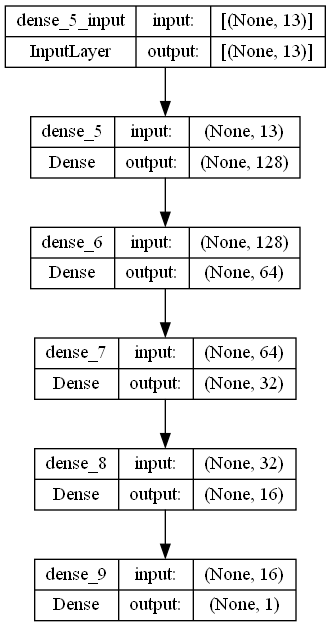

In [21]:
# 모델 구조 시각화
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='boston.png')

In [22]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics='mae')

In [23]:
# 모델 학습
# mini_batch
# batch size 기본값 : 32 -> 404/32 = 13

hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 0s - loss: 562.7947 - mae: 21.8309 - 427ms/epoch - 33ms/step
Epoch 2/100
13/13 - 0s - loss: 488.1955 - mae: 19.9646 - 22ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 338.0201 - mae: 15.5721 - 25ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 152.8982 - mae: 9.5517 - 30ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 126.4297 - mae: 8.8710 - 26ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 97.8464 - mae: 7.3805 - 26ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 80.5298 - mae: 6.6845 - 53ms/epoch - 4ms/step
Epoch 8/100
13/13 - 0s - loss: 67.3773 - mae: 6.0351 - 21ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 59.2237 - mae: 5.5133 - 43ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 54.0707 - mae: 5.2915 - 19ms/epoch - 1ms/step
Epoch 11/100
13/13 - 0s - loss: 50.3197 - mae: 4.9420 - 18ms/epoch - 1ms/step
Epoch 12/100
13/13 - 0s - loss: 47.6906 - mae: 4.9179 - 18ms/epoch - 1ms/step
Epoch 13/100
13/13 - 0s - loss: 44.1344 - mae: 4.6512 - 21ms/ep

In [29]:
# 모델 성능 평가
df = pd.DataFrame(hist.history)

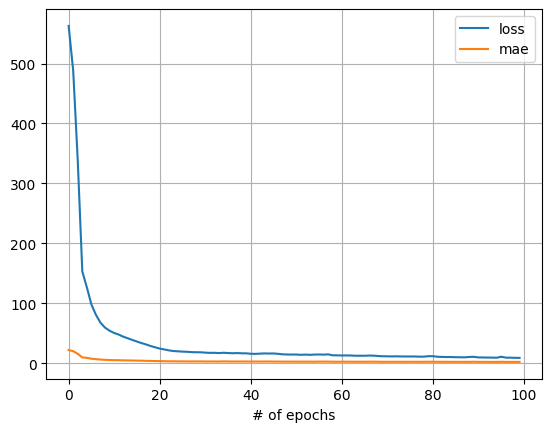

In [33]:
# 모델 학습 과정 시각화
import matplotlib.pyplot as plt
plt.plot(df.loss, label='loss')
plt.plot(df.mae, label='mae')
plt.xlabel('# of epochs')
plt.legend()
plt.grid()

In [35]:
# 모델 검증 혹은 예측
y_pred = model.predict(X_test)

# r2 score로 성능 평가

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

4/4 [==============================] - 0s 2ms/step


0.8539397306025622

In [26]:
# 훈련 데이터의 손실함수값과 검증 데이터의 손실함수값을 에포크별로 비교하여 시각화

# 나중에 해보기